# Stats - absolute change, annual

$$
z = \frac{1}{30} \displaystyle\sum_{y=1}^{30}
(\bar{x}_y - \bar{x}_{hist})
$$

- calculate annual means (or seasonal means for each year)
- calculate the historical mean from the annual means
- calculate difference
- interannual reduction
- ensemble reduction

In [6]:
import importlib
import climag.climag as cplt
import geopandas as gpd
import os
import numpy as np

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)

In [29]:
def describe_dataset(dataset, model=False):
    dataset_df = dataset.to_dataframe()[list(dataset.data_vars)]
    dataset_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # dataset_df.dropna(subset=list(dataset.data_vars), inplace=True)
    if model:
        return dataset_df.groupby("model").describe().T
    else:
        return dataset_df.describe()

In [3]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [4]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


### Mean

In [5]:
ds_ec_norm = cplt.calc_anomaly_absolute(ds_ec, skipna=True)
ds_ec_norm = ds_ec_norm.drop_vars(["bm_c"])
ds_ec_norm = ds_ec_norm.sel(exp=["rcp45", "rcp85"])
# get interannual mean, and then the ensemble mean
ds_ec_norm_reduced = ds_ec_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

In [33]:
describe_dataset(ds_ec_norm_reduced)

,bm,gro
count,1530.000000,1530.000000
mean,-138.189499,0.627497
std,72.608009,1.184910
min,-398.161743,-2.669838
25%,-183.193695,-0.099009
50%,-142.041107,0.504472
75%,-101.491318,1.397880
max,-0.000131,5.981178


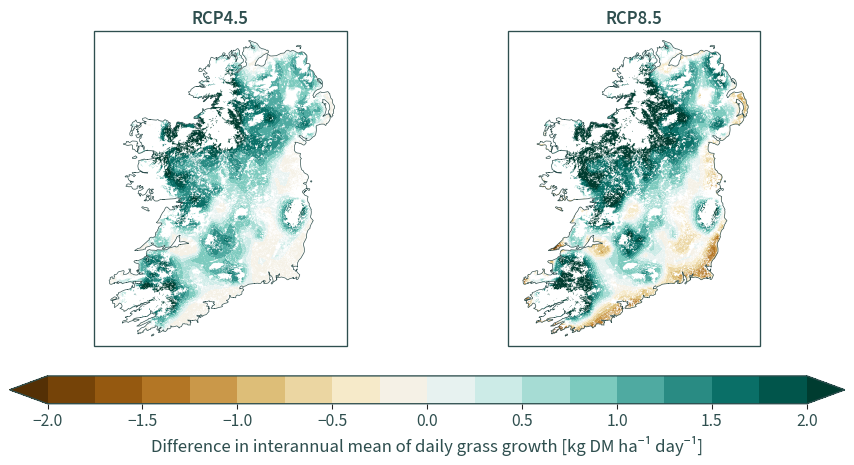

In [24]:
cplt.plot_stats(ds_ec_norm_reduced["gro"], cplt.projection_eurocordex, mask, ie_bbox, label="Difference in interannual mean of daily grass growth [kg DM ha⁻¹ day⁻¹]", levels=np.arange(-2, 2 + 0.25, 0.25))

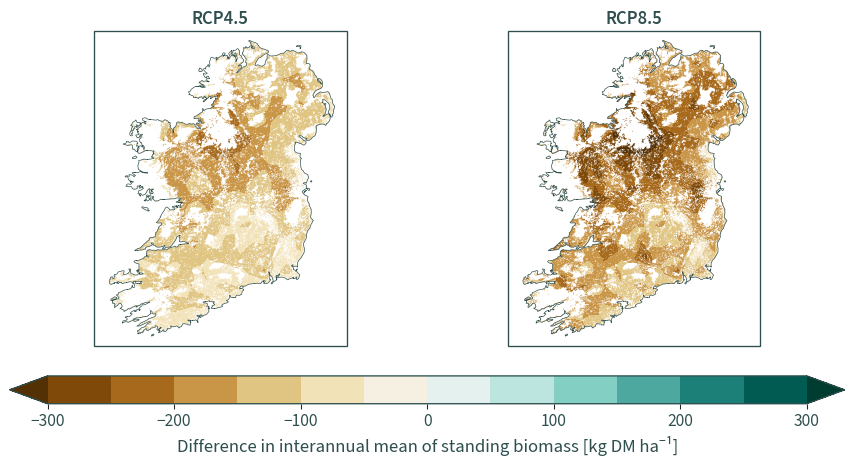

In [27]:
cplt.plot_stats(ds_ec_norm_reduced["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Difference in interannual mean of standing biomass [kg DM ha⁻¹]", levels=np.arange(-300, 300 + 50, 50))

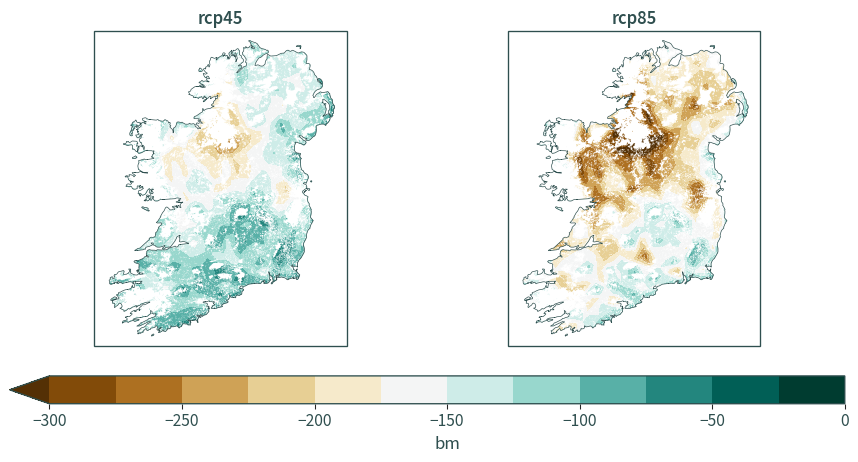

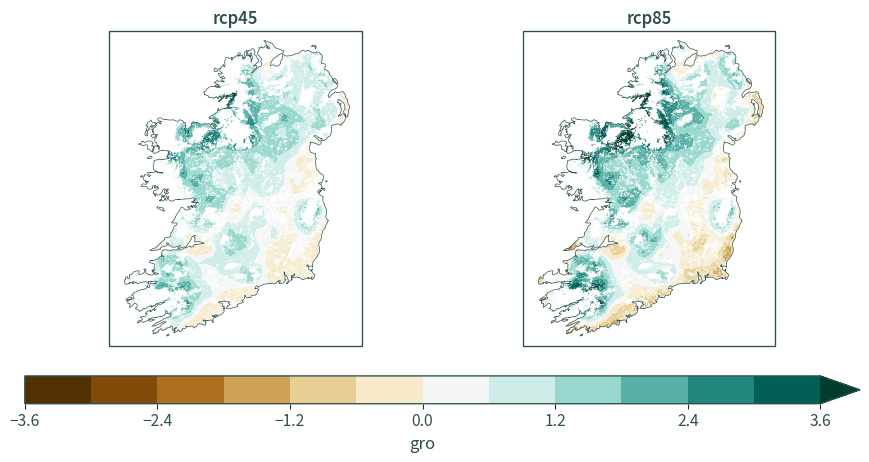

In [26]:
cplt.plot_stats(ds_ec_norm_reduced, cplt.projection_eurocordex, mask, ie_bbox)

### Max

In [27]:
ds_ec_norm_cbm = cplt.calc_anomaly_absolute(ds_ec, skipna=True, var_avg="max")
ds_ec_norm_cbm = ds_ec_norm_cbm.drop_vars(["bm", "gro"])
ds_ec_norm_cbm = ds_ec_norm_cbm.sel(exp=["rcp45", "rcp85"])
ds_ec_norm_reduced_cbm = ds_ec_norm_cbm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

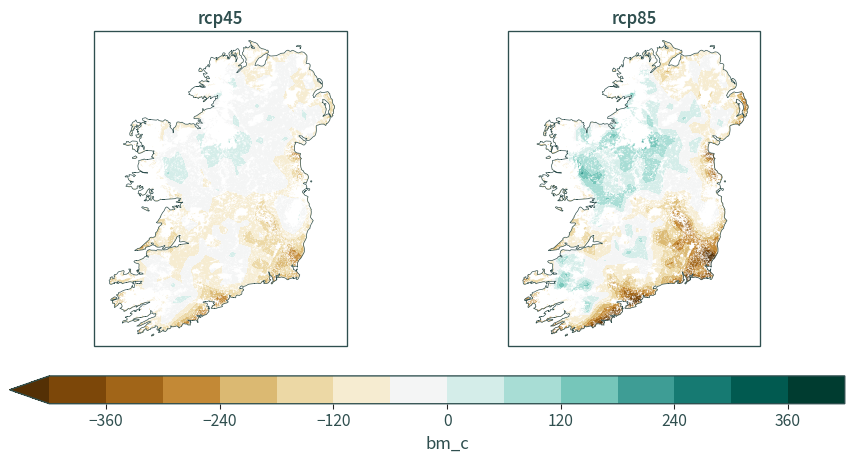

In [28]:
cplt.plot_stats(ds_ec_norm_reduced_cbm, cplt.projection_eurocordex, mask, ie_bbox)

## HiResIreland

In [14]:
ds_hr = cplt.load_all_data("HiResIreland")

### Mean

In [15]:
ds_hr_norm = cplt.calc_anomaly_absolute(ds_hr, skipna=True)
ds_hr_norm = ds_hr_norm.drop_vars(["bm_c"])
ds_hr_norm = ds_hr_norm.sel(exp=["rcp45", "rcp85"])
ds_hr_norm_reduced = ds_hr_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

In [34]:
describe_dataset(ds_hr_norm_reduced)

,bm,gro
count,12236.000000,12236.000000
mean,-154.657822,-0.883834
std,69.340508,0.578359
min,-453.004181,-3.107973
25%,-197.397522,-1.247058
50%,-149.291733,-0.923908
75%,-105.776596,-0.559004
max,-0.000159,2.060661


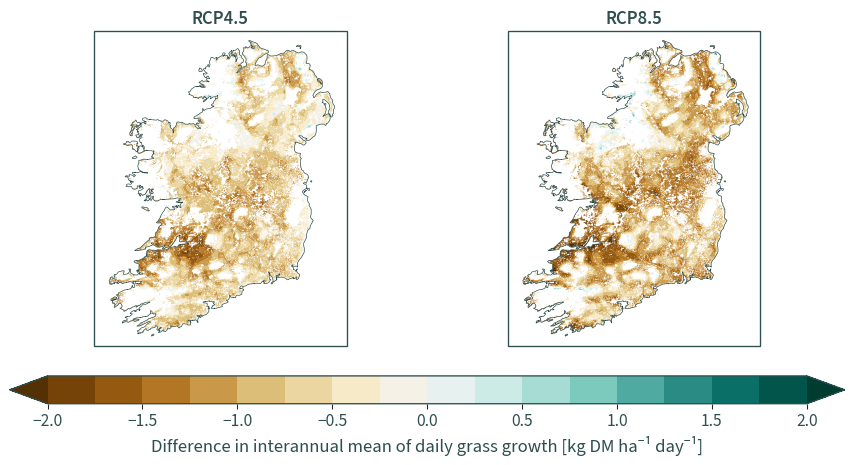

In [23]:
cplt.plot_stats(ds_hr_norm_reduced["gro"], cplt.projection_hiresireland, mask, ie_bbox, label="Difference in interannual mean of daily grass growth [kg DM ha⁻¹ day⁻¹]", levels=np.arange(-2, 2 + 0.25, 0.25))

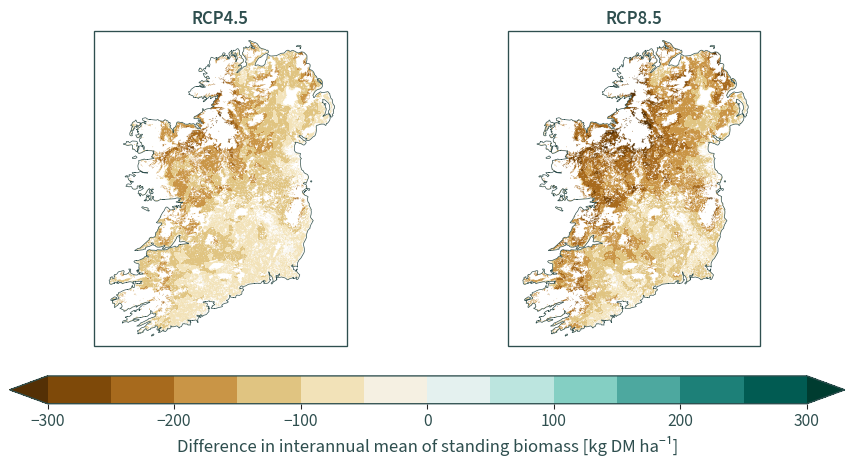

In [28]:
cplt.plot_stats(ds_hr_norm_reduced["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Difference in interannual mean of standing biomass [kg DM ha⁻¹]", levels=np.arange(-300, 300 + 50, 50))

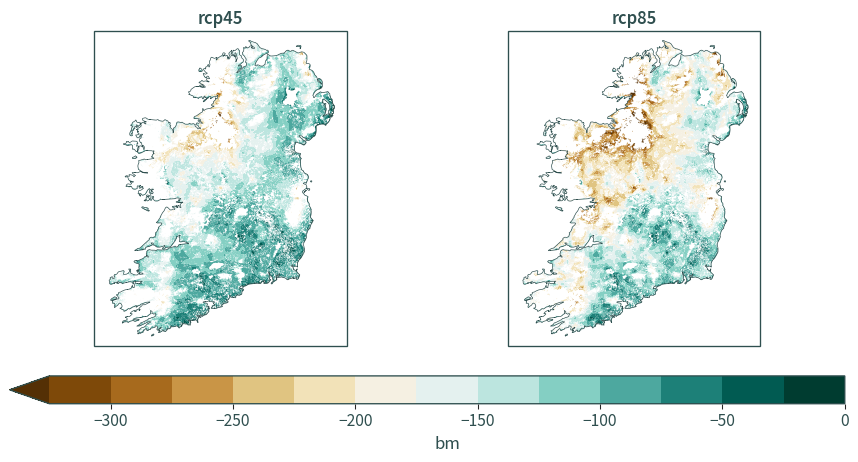

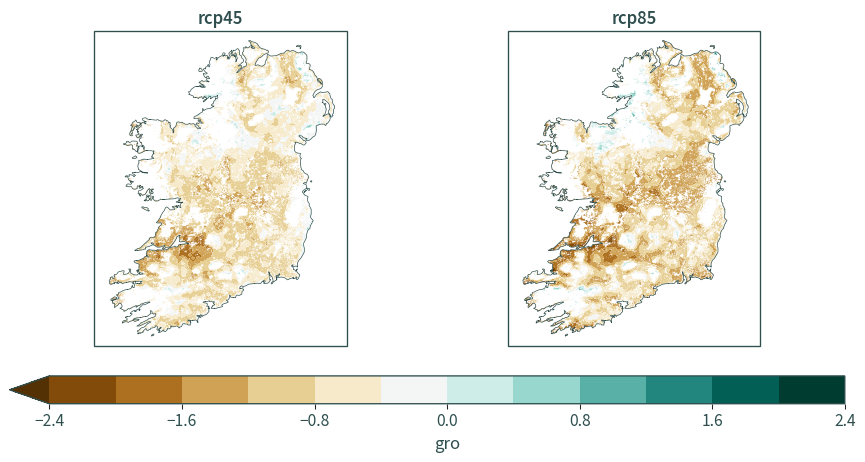

In [5]:
cplt.plot_stats(ds_hr_norm_reduced, cplt.projection_hiresireland, mask, ie_bbox)

### Max

In [6]:
ds_hr_norm_cbm = cplt.calc_anomaly_absolute(ds_hr, skipna=True, var_avg="max")
ds_hr_norm_cbm = ds_hr_norm_cbm.drop_vars(["bm", "gro"])
ds_hr_norm_cbm = ds_hr_norm_cbm.sel(exp=["rcp45", "rcp85"])
ds_hr_norm_reduced_cbm = ds_hr_norm_cbm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

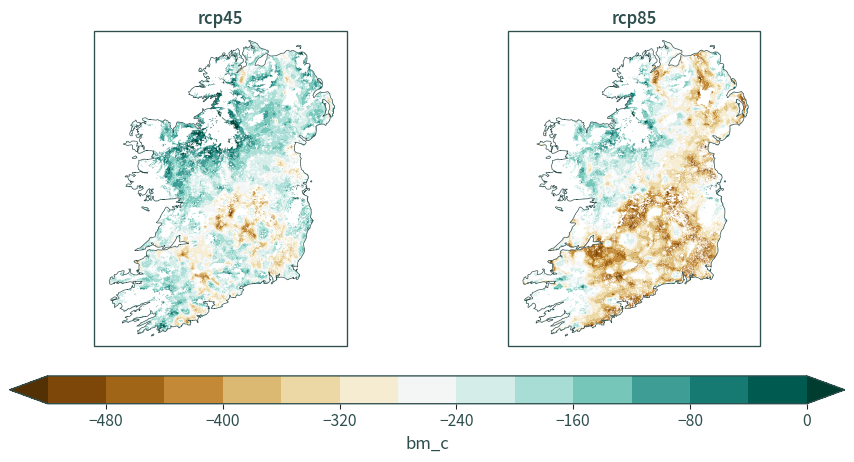

In [7]:
cplt.plot_stats(ds_hr_norm_reduced_cbm, cplt.projection_hiresireland, mask, ie_bbox)